<a href="https://colab.research.google.com/github/alpeshyadav/Internship/blob/master/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Mall_Customers datasets 

In [3]:
kmeans = None
k = 0

In [4]:
def split_dataset(X):
  return train_test_split(X, test_size=0.33, random_state=42)


In [58]:
def k_means(X):
  global kmeans
  global k
  wcss = []
  for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    wcss.append(kmeans.inertia_)  
  distances = []
 
  x1, y1 = (1, wcss[0])
  x2, y2 = (10, wcss[9])
  norm = np.linalg.norm
  for i in range(0,10):
    x0, y0 = (i+1, wcss[i])
    d = np.abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1) / np.sqrt(np.square(y2-y1) + np.square(x2-x1))
    distances.append([d, i+1])

  _max = max(distances)
  k = _max[1]
  print(f'The most suitable value of k is {_max[1]}')
  kmeans = KMeans(n_clusters=k, random_state=0).fit(X)


In [47]:
def graphical_method_to_find_k(X):
  clusters = []

  for i in range(1, 11):
      km = KMeans(n_clusters=i).fit(X)
      clusters.append(km.inertia_)
      
  plt.figure()
  fig, ax = plt.subplots(figsize=(12, 8))
  sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
  ax.set_title('Searching for Elbow')
  ax.set_xlabel('Clusters')
  ax.set_ylabel('Inertia')

In [52]:
def predict(test):
  global kmeans
  return kmeans.predict(test)

In [49]:
def visualize(train):
  global kmeans
  global k
  train['Labels'] = kmeans.labels_
  plt.figure()
  sns.scatterplot(train['Annual Income (k$)'], train['Spending Score (1-100)'], hue=train['Labels'], palette=sns.color_palette('hls', k))

In [54]:
dataset = pd.read_csv('./Mall_Customers.csv')
dataset.drop(['CustomerID', 'Gender'], axis=1, inplace=True)
train, test = split_dataset(dataset)
train.head()

,Age,Annual Income (k$),Spending Score (1-100)
42,48,39,36
189,36,103,85
90,68,59,55
136,44,73,7
51,33,42,60


In [59]:
k_means(train)


The most suitable value of k is 4


<Figure size 432x288 with 0 Axes>

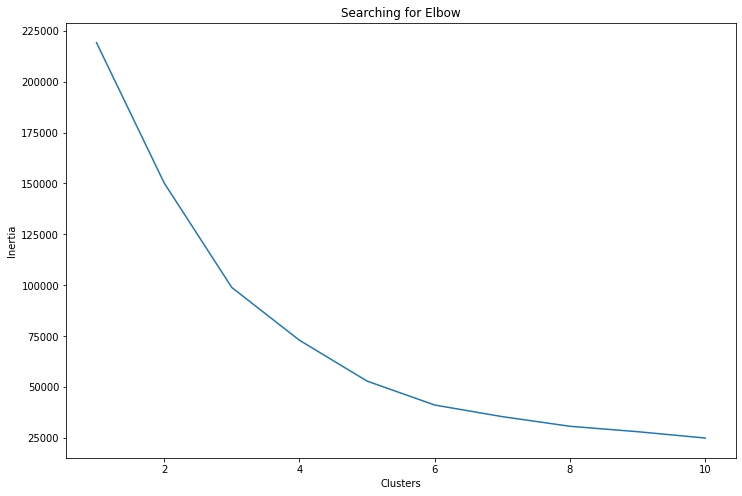

In [60]:
#manually with the help of graph we can come up with the most suitable value of k

graphical_method_to_find_k(train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


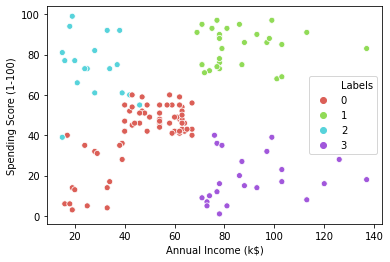

In [61]:
#visulization is done on the value of k obtained mathematically 

visualize(train)

In [62]:
predict(test)

array([0, 2, 0, 3, 3, 0, 0, 3, 3, 2, 0, 3, 1, 0, 3, 1, 0, 3, 0, 2, 3, 0,
       3, 0, 2, 0, 0, 0, 1, 3, 2, 0, 0, 0, 3, 0, 1, 1, 3, 0, 0, 1, 0, 0,
       0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 3, 0, 3, 0, 1, 0, 2, 0, 2, 0],
      dtype=int32)